<a href="https://colab.research.google.com/github/Pravallika-Myneni/Simple-linear-regression/blob/main/Asg01_MLDLS21_version_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the basic modules we need

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting and Visualizing data
import seaborn as sns ## for visualizing data

##1. Data

I have tried several datasets available online, even tried some webscraping but was not satisfied with the length of datasets. 

I came across the ***make_regreesion*** function and used it to make my own dataset of 400 samples

In [2]:
from sklearn.datasets import make_regression
X,y = make_regression (n_samples = 400, n_features = 1, n_informative = 1, noise= 45, random_state = 121, bias= 0.25)

In [3]:
X.shape, y.shape

((400, 1), (400,))

In [4]:
dataset = pd.DataFrame({'X':X.squeeze(),'y':y})
dataset

,X,y
0,0.293904,-7.079618
1,0.725839,18.288035
2,1.257253,81.683706
3,0.824424,57.863076
4,0.168823,21.475845
...,...,...
395,-1.540080,-226.697871
396,-0.799629,-131.123181
397,1.523444,153.787236
398,2.090845,213.300796


##2. EDA

### Datatypes of columns

In [5]:
dataset.dtypes

X    float64
y    float64
dtype: object

### Checking for null values

In [6]:
dataset.isnull().sum()

X    0
y    0
dtype: int64

### Descriptive statistics of data

In [7]:
dataset.describe()

,X,y
count,400.000000,400.000000
mean,0.021573,3.986830
std,0.957861,103.910800
min,-3.086725,-311.959312
25%,-0.542163,-69.389276
50%,0.038338,3.195375
75%,0.666901,76.785291
max,3.015557,285.910900


### Plotting X and y

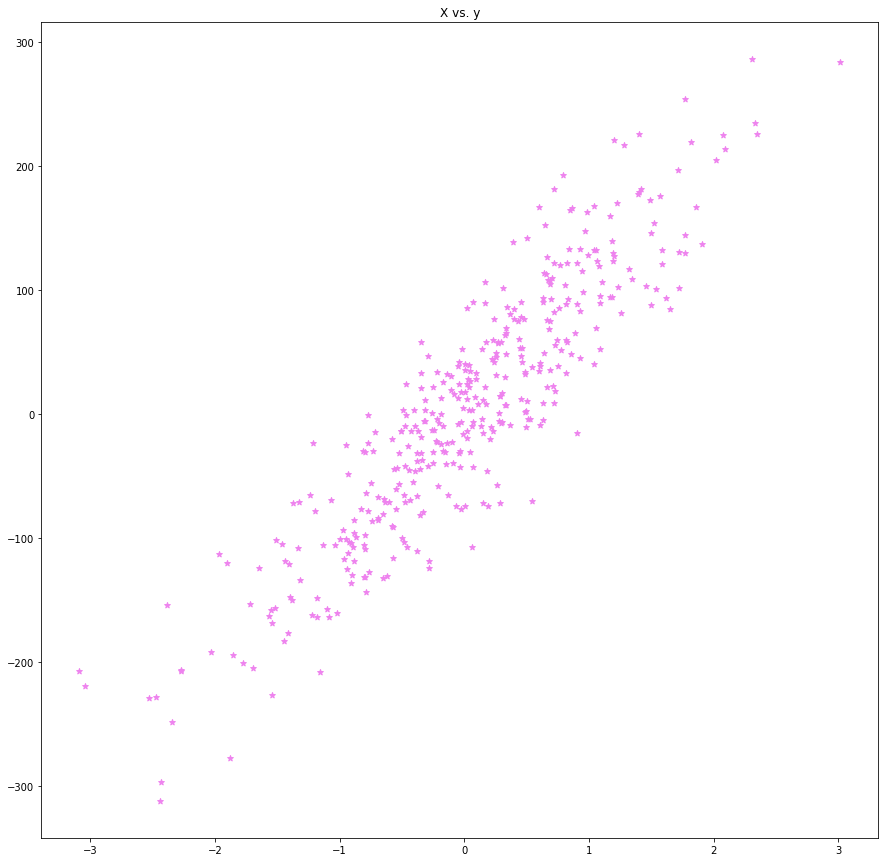

In [8]:
plt.figure(figsize=(15,15))
plt.title('X vs. y')
plt.scatter(X,y,color='violet',marker='*')

### Correlation

In [9]:
correlation = dataset.corr()
correlation

,X,y
X,1.000000,0.908943
y,0.908943,1.000000


##3. Implementing Simple Linear regression

###Splitting the data into train and test

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 1703)
print("Training size: ", (X_train.shape[0], y_train.shape[0]))
print("Testing size: ", (X_test.shape[0], y_test.shape[0]))

Training size:  (300, 300)
Testing size:  (100, 100)


### Developing a regression model and fitting the train_data

In [11]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(X_train, y_train)

In [12]:
predictions = linear_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


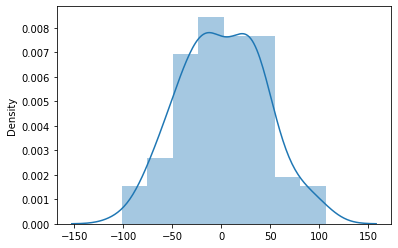

In [13]:
sns.distplot((y_test-predictions))

#4. Performance Analysis

##Accuracy

In [14]:
print(linear_regression.score(X_test, y_test))

0.804678537584997


## Regressor Curve

###For the training data

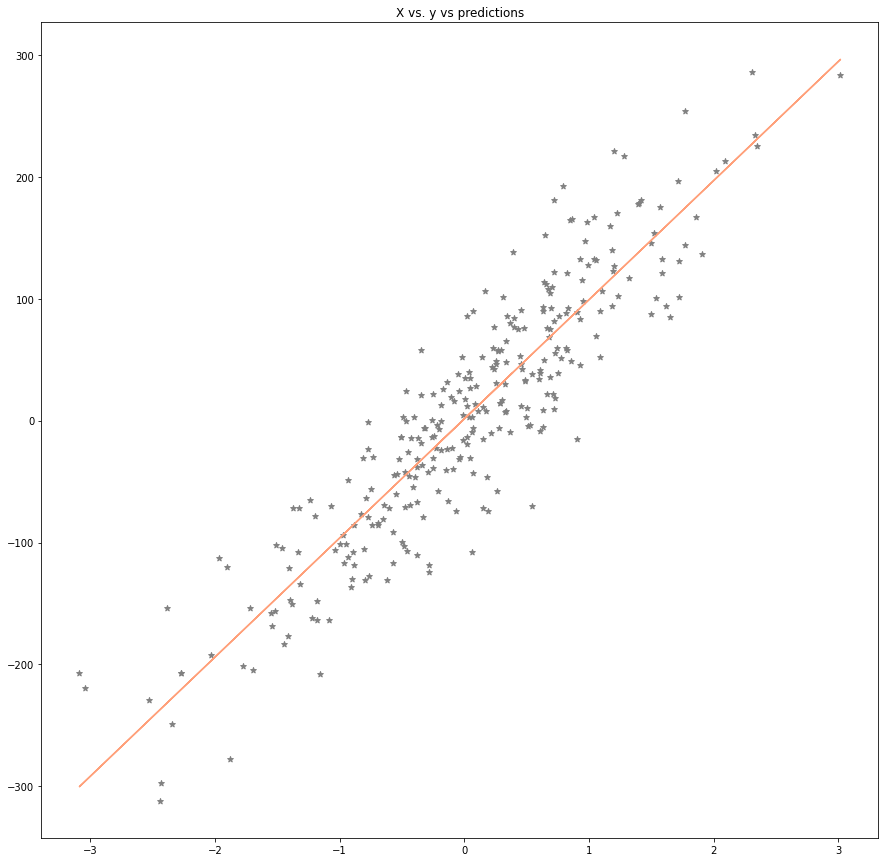

In [15]:
plt.figure(figsize=(15,15))
plt.title('X vs. y vs predictions')
plt.scatter(X_train,y_train,color='grey',marker='*')
plt.plot(X_train, linear_regression.predict(X_train), color ="lightsalmon")
plt.show()

###For the testing data

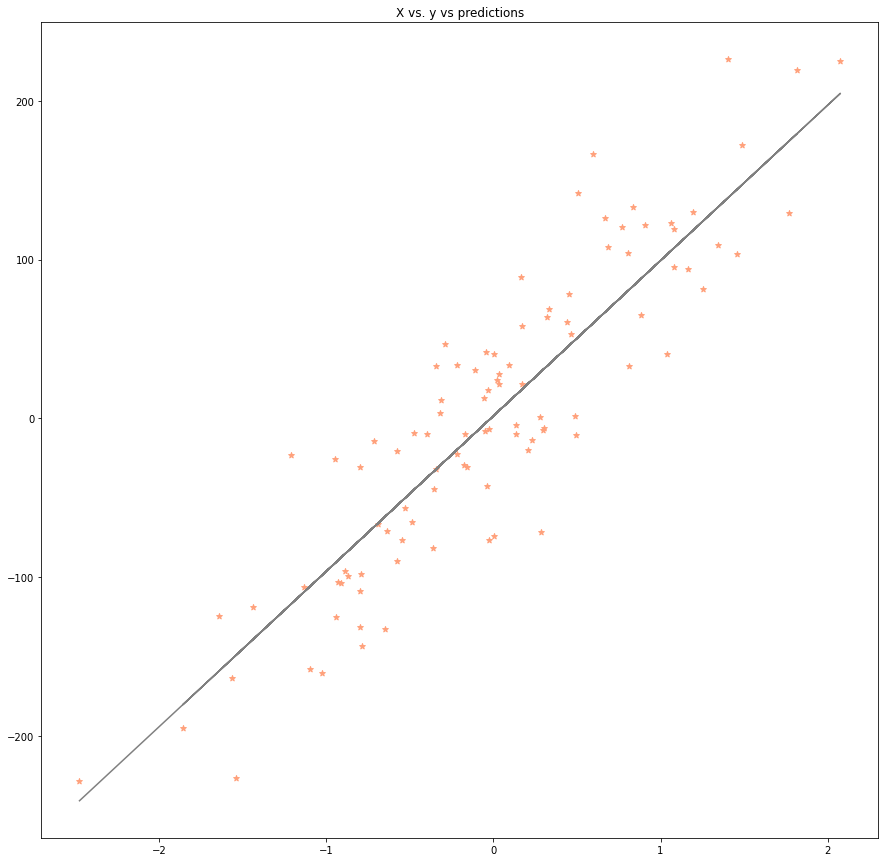

In [16]:
plt.figure(figsize=(15,15))
plt.title('X vs. y vs predictions')
plt.scatter(X_test,y_test,color='lightsalmon',marker='*')
plt.plot(X_test, linear_regression.predict(X_test), color ="grey")
plt.show()

#5. Form for collecting the user Input

In [17]:
%%html
<marquee style='width: 100%; color: purple;'><b>Enter X value in the form below to get the y value!!</b></marquee>

In [18]:
#@title Determing y using X
#@title User Input
X_input =  40#@param {type:"number"}


In [19]:
y_output = linear_regression.predict(np.array([[X_input]]))
print("The output y of the simple linear regression model developed by Pravallika is: ", y_output[0])

The output y of the simple linear regression model developed by Pravallika is:  3913.760071842963
